In [1]:
###
# inside acquire.py script:
from env import uname, pwd, host
import env
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing

In [2]:
train,validate,test = wrangle.wrangle_zillow()
train

,beds,baths,sqft,taxable_value,built,tax,fips
1941838,4,3,2015,209197,1941,2337,6037
1421974,4,2,1303,285279,1960,3029,6111
1346162,3,2,2128,374480,1950,4668,6111
1492536,2,2,1626,243656,1951,3211,6037
349555,3,2,1406,313183,1950,3879,6037
...,...,...,...,...,...,...,...
389482,2,1,742,329955,1928,4062,6037
677893,3,2,1155,438972,1958,5365,6037
1121893,3,1,1056,128151,1974,2119,6037
172656,5,3,2061,442589,1958,5092,6111


In [3]:
train.shape,validate.shape,test.shape

((1198531, 7), (299633, 7), (642071, 7))

## Now we scale continuous data...sqft and tax...taxable_value is the target...no scaling



In [4]:
train.sqft.describe()

count    1.198531e+06
mean     1.863990e+03
std      1.302229e+03
min      1.000000e+00
25%      1.258000e+03
50%      1.624000e+03
75%      2.208000e+03
max      9.525760e+05
Name: sqft, dtype: float64

In [5]:
train.tax.describe()

count    1.198531e+06
mean     5.621941e+03
std      7.844116e+03
min      1.300000e+01
25%      2.540000e+03
50%      4.109000e+03
75%      6.411000e+03
max      1.078101e+06
Name: tax, dtype: float64

In [6]:
train = train[train.sqft < 10000]
train.sqft.describe()

count    1.197565e+06
mean     1.854300e+03
std      9.105491e+02
min      1.000000e+00
25%      1.258000e+03
50%      1.623000e+03
75%      2.206000e+03
max      9.999000e+03
Name: sqft, dtype: float64

In [7]:
train = train[train.tax < 20000]
train.tax.describe()

count    1.168049e+06
mean     4.804570e+03
std      3.379141e+03
min      1.300000e+01
25%      2.497000e+03
50%      4.020000e+03
75%      6.159000e+03
max      1.999900e+04
Name: tax, dtype: float64

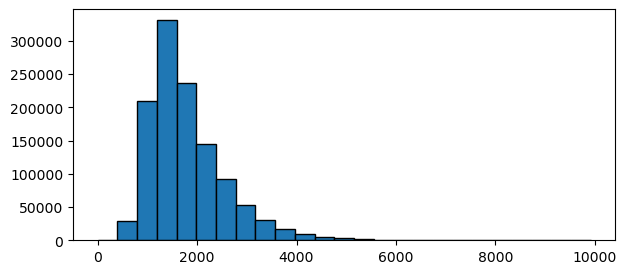

In [8]:
plt.figure(figsize=(7,3))
plt.hist(train.sqft,bins=25,ec='black')
plt.show()

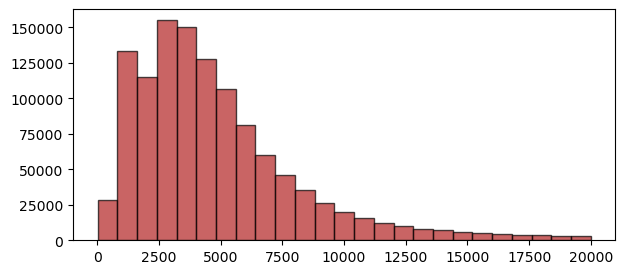

In [9]:
plt.figure(figsize=(7,3))
plt.hist(train.tax,bins=25,ec='black',color='firebrick',alpha=0.7)
plt.show()

## Look at the histograms with the various scalers applied

In [ ]:
# SCALE sqft with min-max
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['sqft']])

train_sqft_scaled = scaler.transform(train[['sqft']])
validate_sqft_scaled = scaler.transform(validate[['sqft']])
test_sqft_scaled = scaler.transform(test[['sqft']])

# View sqft Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black')
plt.show()

In [ ]:
# SCALE tax with min-max
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['tax']])

train_sqft_scaled = scaler.transform(train[['tax']])
validate_sqft_scaled = scaler.transform(validate[['tax']])
test_sqft_scaled = scaler.transform(test[['tax']])

# View tax Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black',color='firebrick',alpha=0.7)
plt.show()

In [ ]:
# SCALE sqft with STANDARD SCALer
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['sqft']])

train_sqft_scaled = scaler.transform(train[['sqft']])
validate_sqft_scaled = scaler.transform(validate[['sqft']])
test_sqft_scaled = scaler.transform(test[['sqft']])

# View sqft Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black')
plt.show()

In [ ]:
# SCALE tax with STANDARD
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['tax']])

train_sqft_scaled = scaler.transform(train[['tax']])
validate_sqft_scaled = scaler.transform(validate[['tax']])
test_sqft_scaled = scaler.transform(test[['tax']])

# View tax Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black',color='firebrick',alpha=0.7)
plt.show()

In [ ]:
# SCALE sqft with ROBUST SCALer
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train[['sqft']])

train_sqft_scaled = scaler.transform(train[['sqft']])
validate_sqft_scaled = scaler.transform(validate[['sqft']])
test_sqft_scaled = scaler.transform(test[['sqft']])

# View sqft Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black')
plt.show()

In [ ]:
# SCALE tax with ROBUST
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train[['tax']])

train_sqft_scaled = scaler.transform(train[['tax']])
validate_sqft_scaled = scaler.transform(validate[['tax']])
test_sqft_scaled = scaler.transform(test[['tax']])

# View tax Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black',color='firebrick',alpha=0.7)
plt.show()

## 2 Inverse transform

In [ ]:
# INVERSE tax with .inverse_transform
transformed_tax = scaler.fit(train[['tax']]).inverse_transform(train[['tax']])

# View tax Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(transformed_tax,bins=25,ec='black',color='firebrick',alpha=0.7)
plt.show()

## QuantileTransformer

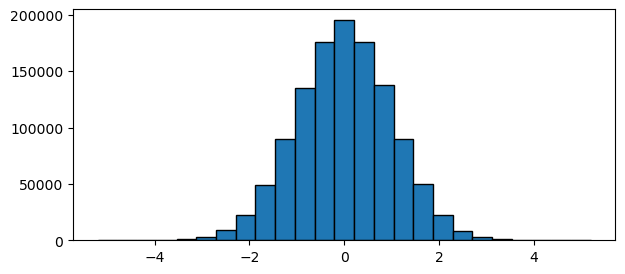

In [10]:
# SCALE sqft with QUANTILE TRANSFORMER with 'normal' DIST
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit(train[['sqft']])

train_sqft_scaled = scaler.transform(train[['sqft']])
validate_sqft_scaled = scaler.transform(validate[['sqft']])
test_sqft_scaled = scaler.transform(test[['sqft']])

# View sqft Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black')
plt.show()

In [ ]:
# SCALE sqft with QUANTILE TRANSFORMER with 'uniform' DIST the default
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit(train[['sqft']])

train_sqft_scaled = scaler.transform(train[['sqft']])
validate_sqft_scaled = scaler.transform(validate[['sqft']])
test_sqft_scaled = scaler.transform(test[['sqft']])

# View sqft Scaled with min-max
plt.figure(figsize=(7,3))
plt.hist(train_sqft_scaled,bins=25,ec='black')
plt.show()

## Chosen scaler is QuantileTransformer with 'normal' setting...copy the following function into prepare.py

In [ ]:
# SCALE col with QUANTILE TRANSFORMER with 'normal' DIST

def scale_zillow_col(df,col,n_quantiles=1000):
    '''
    accepts a df column and applies a QuantileTransformer with 'normal' output to the specified column.
    
    outputs a normal, standard array based upon the scaled 
    
    
    '''
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    scaler.fit(train[['sqft']])

    train_sqft_scaled = scaler.transform(train[['sqft']])
    validate_sqft_scaled = scaler.transform(validate[['sqft']])
    test_sqft_scaled = scaler.transform(test[['sqft']])
